In [1]:
import pandas as pd

In [137]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [311]:
df['OnlineBackup'].head(3)

0    Yes
1     No
2    Yes
Name: OnlineBackup, dtype: object

In [7]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [121]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [123]:
df['Churn'].value_counts(normalize=True)*100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

In [129]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [139]:
# Drop 'customerID' as it's not a predictive feature
df = df.drop('customerID', axis=1)

In [133]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [57]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [143]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [145]:
print("Total number of null Value " , df['TotalCharges'].isnull().sum())

Total number of null Value  11


In [147]:
df.shape

(7043, 20)

In [149]:
# Drop rows with missing values (they are few)
df.dropna(inplace=True)

In [151]:
df.shape

(7032, 20)

In [153]:
print("Total number of null Value " , df['TotalCharges'].isnull().sum())

Total number of null Value  0


In [155]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [157]:
def binary(x):
    if x=='Yes':
        return 1
    elif x=='No' :
        return 0

In [159]:
df['Churn']=df['Churn'].apply(binary)

In [161]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


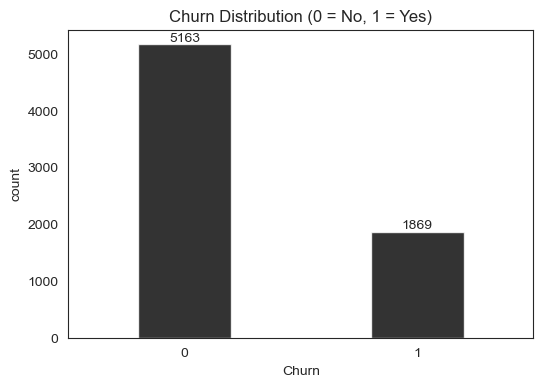

In [165]:
sns.set_style('white')

plt.figure(figsize=(6, 4))
ax =sns.countplot(x='Churn', data=df, color = 'black',alpha=0.8,width=0.4)
ax.bar_label(ax.containers[0])
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()

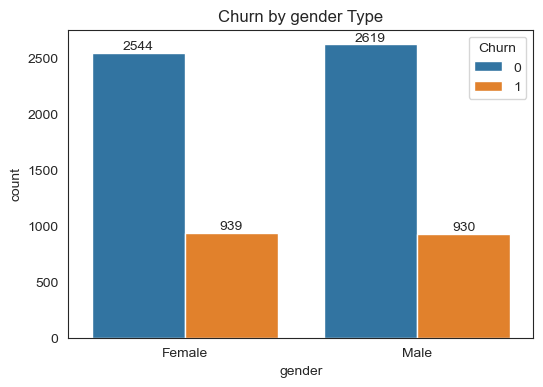

In [167]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='gender', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by gender Type')
plt.show()

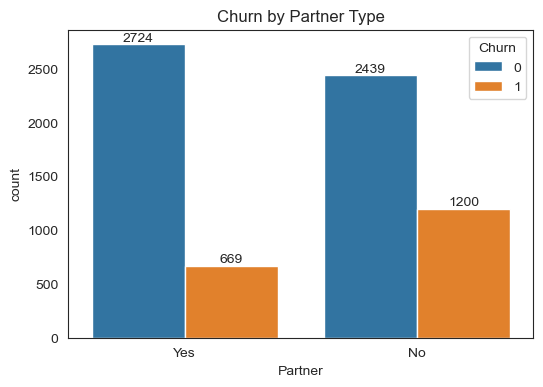

In [169]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='Partner', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by Partner Type')
plt.show()

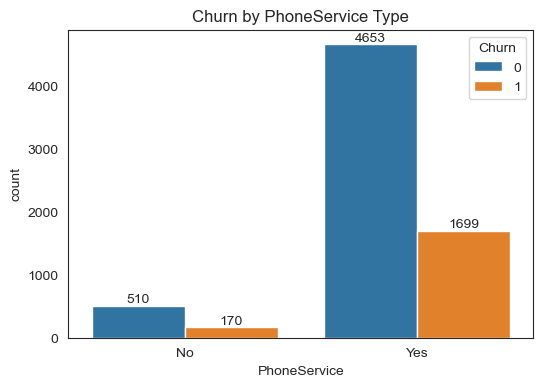

In [175]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='PhoneService', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by PhoneService Type')
plt.show()

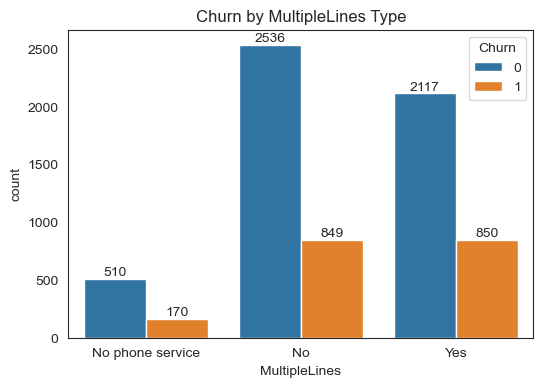

In [173]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='MultipleLines', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by MultipleLines Type')
plt.show()

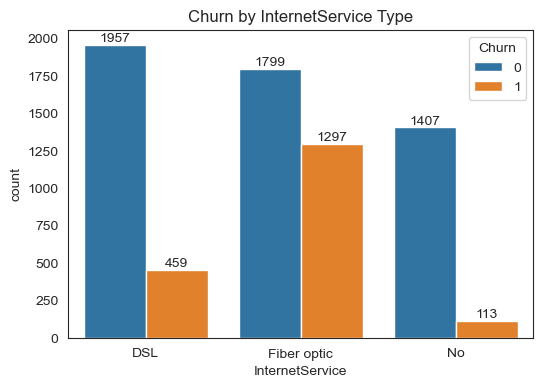

In [177]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='InternetService', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by InternetService Type')
plt.show()

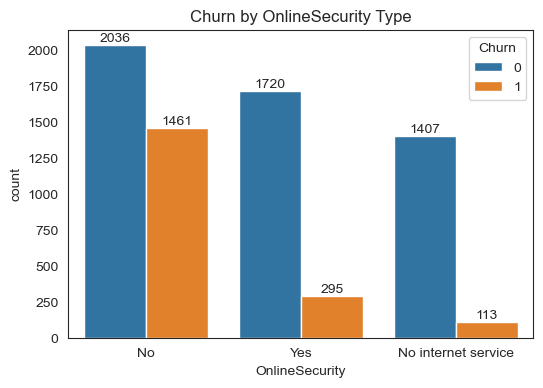

In [181]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by OnlineSecurity Type')
plt.show()

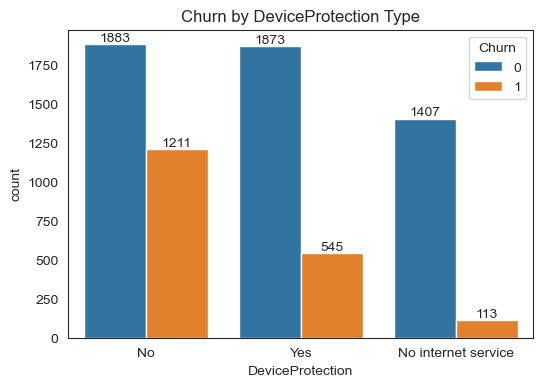

In [183]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='DeviceProtection', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by DeviceProtection Type')
plt.show()

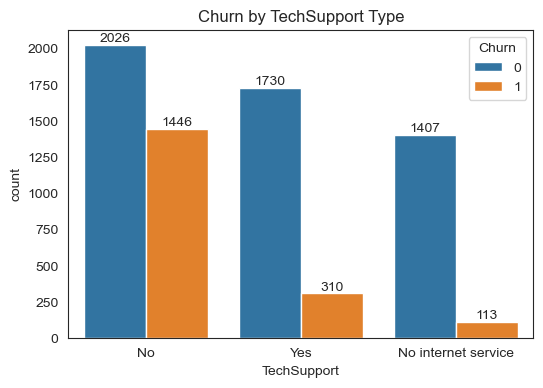

In [185]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='TechSupport', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by TechSupport Type')
plt.show()

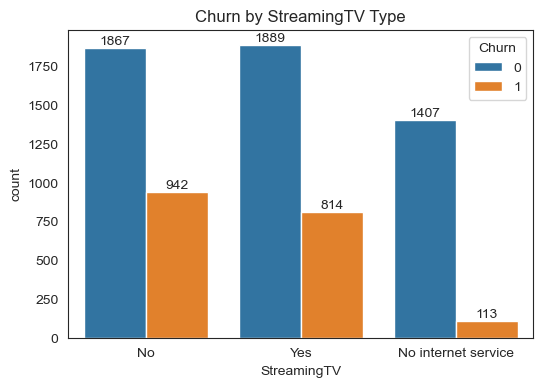

In [187]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='StreamingTV', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by StreamingTV Type')
plt.show()

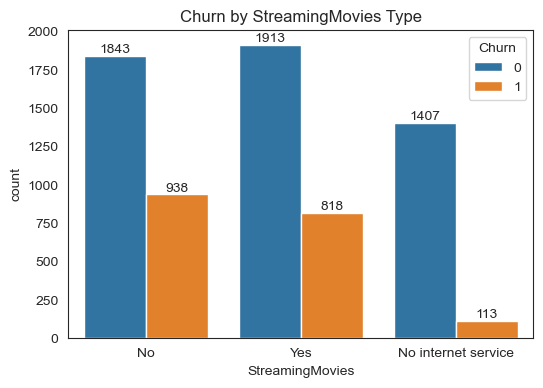

In [189]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='StreamingMovies', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by StreamingMovies Type')
plt.show()

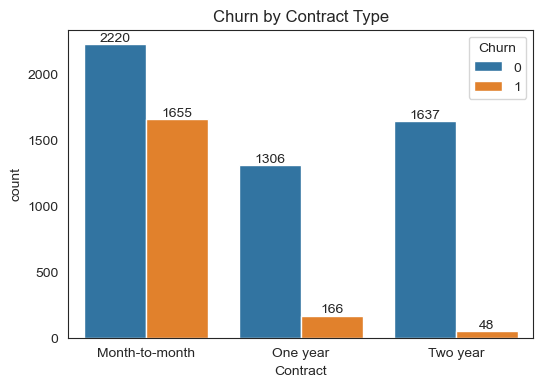

In [193]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='Contract', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by Contract Type')
plt.show()

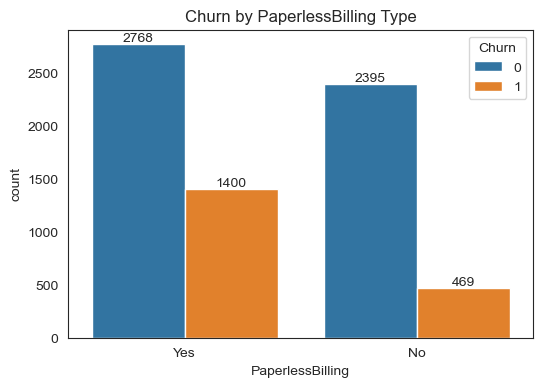

In [195]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by PaperlessBilling Type')
plt.show()

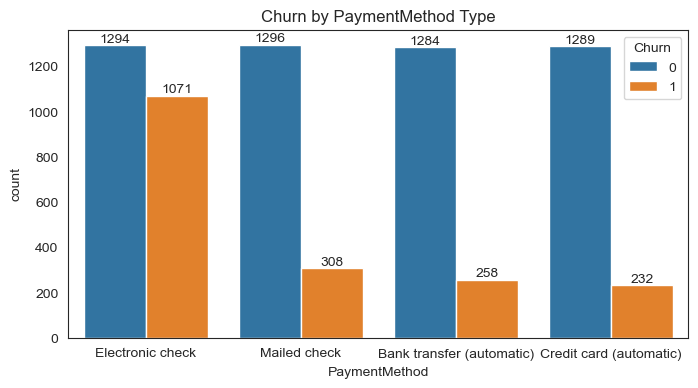

In [197]:
plt.figure(figsize=(8, 4))
ax=sns.countplot(x='PaymentMethod', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by PaymentMethod Type')
plt.show()

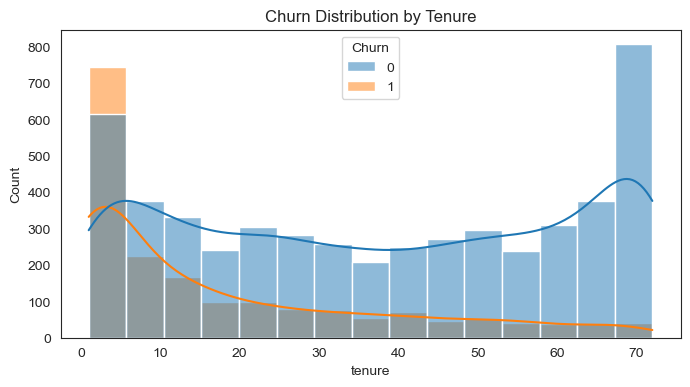

In [201]:
plt.figure(figsize=(8, 4))
ax=sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
ax.set_title('Churn Distribution by Tenure')
plt.show()

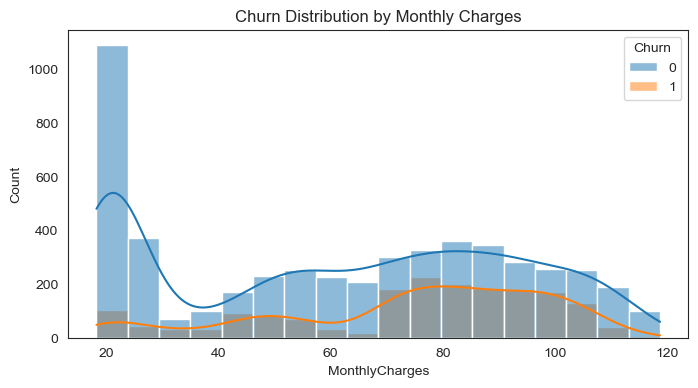

In [203]:
plt.figure(figsize=(8, 4))
axe=sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
axe.set_title('Churn Distribution by Monthly Charges')
plt.show()

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
print("Libraries imported successfully!")

Libraries imported successfully!


In [213]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [215]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (7032, 19)
y shape: (7032,)


In [243]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
print('Numerical Features are : ',numeric_features)

Numerical Features are :  ['tenure', 'MonthlyCharges', 'TotalCharges']


In [245]:
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]
print('Categorical Features are : ',categorical_features)

Categorical Features are :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [251]:
# Create the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [253]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
print('Sucessfully Creating the preprocessing pipelines .......')

Sucessfully Creating the preprocessing pipelines .......


In [255]:
# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
print('Sucessfully combine pipelines ..............')

Sucessfully combine pipelines ..............


In [257]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [277]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (4922, 19)
x_test shape: (2110, 19)


In [279]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [281]:
print("Training the Random Forest model...")
model.fit(x_train, y_train)
print("Model training complete!")

Training the Random Forest model...
Model training complete!


In [287]:
y_pred = model.predict(x_test)

In [289]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 78.29%


In [291]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churn (0)', 'Churn (1)']))


Classification Report:
               precision    recall  f1-score   support

Not Churn (0)       0.82      0.90      0.86      1549
    Churn (1)       0.62      0.47      0.53       561

     accuracy                           0.78      2110
    macro avg       0.72      0.68      0.70      2110
 weighted avg       0.77      0.78      0.77      2110



Plotting Confusion Matrix...


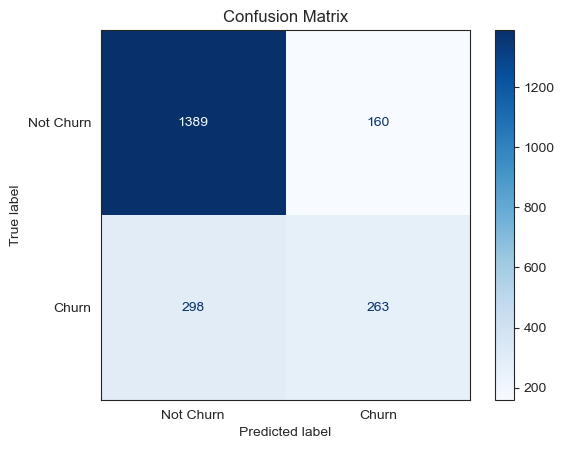

In [303]:
print("Plotting Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [305]:
sample_customer = pd.DataFrame({
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [12], 
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['Yes'],
    'StreamingMovies': ['Yes'],
    'Contract': ['Month-to-month'], 
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [95.50],
    'TotalCharges': [1100.00]
})
print('Successfully add new data sample ........')

Successfully add new data sample ........


In [307]:
prediction = model.predict(sample_customer)[0]
probability = model.predict_proba(sample_customer)[0]
print("\n--- Prediction Result ---")
if prediction == 1:
    print(f"Result: LIKELY TO CHURN (Probability: {probability[1]*100:.2f}%)")
else:
    print(f"Result: LIKELY TO STAY (Probability: {probability[0]*100:.2f}%)")


--- Prediction Result ---
Result: LIKELY TO CHURN (Probability: 82.00%)


In [309]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))